# Datenanalyse (Lösungen)

☝️ Beachte: es gibt beim Programmieren fast immer verschiedene Lösungswege. Deine Lösung mag anders aussehen, aber dennoch zum gewünschten Resultat führen. Das richtige Resultat ist das Wichtigste. 

⚠️ Führe folgenden Code aus, bevor du einzelne Lösungen ausführst. Im Lehrnotebook sortieren wir das DataFrame zu einem bestimmten Zeitpunkt. Diese Sortierung nehmen wir im Lösungsnotebook nicht vor, weswegen die Reihenfolge der Zeilen ab einem gewissen Punkt abweicht. Dies ist nicht weiter schlimm und wird bloß erwähnt, dass Du nicht wunderst, warum die Daten zwischen den beiden Notebooks vermeintlich anders ausschauen.

In [1]:
import pandas as pd

#Achtung: anderer Pfad als im Notebook, da das Lösungsnotebook in einem anderen Verzeichnis liegt 
with open("../../3_Dateien/Songkorpus/songkorpus_token.tsv") as f:
    songkorpus = pd.read_csv(f, sep="\t")
    
songkorpus.columns = ["Token", "Jahr", "Häufigkeit"]

tokens = songkorpus["Token"]

decades = []
for year in (songkorpus["Jahr"]):
    decade = str(year)[:-1] + "0"
    decades.append(decade)
    
songkorpus["Jahrzehnt"] = decades
original_len = len(songkorpus)

*** 

✏️ **Lösung 1:** Erstelle eine weitere Series, die nur das 100.000te, 200.000te und 300.000te Token der Series `tokens` beinhält. 

In [2]:
print(tokens[[100000,200000,300000]]) #Alternative 1: Liste an Indizes (beachte die inneren eckigen Klammern!)
print(tokens[100000::100000]) #Alternative 2: Slicing mit Start-Index 100000 und Step 100000, vgl. zweites Notebook

100000      Leuten
200000       alten
300000    mitnehme
Name: Token, dtype: object
100000      Leuten
200000       alten
300000    mitnehme
Name: Token, dtype: object


*** 

✏️ **Lösung 2:** 

1. Lies die Datei `songkorpus_tokens.tsv` abermals ein und übergib beim Erstellen des DataFrames zusätzlich den Parameter `index_col=0`. Dadurch wird die erste Spalte (mit dem Index 0), also diejenige mit den Tokens, zur sog. *Index-Spalte*. Jede Zeile hat nun statt einem numerischen Index einen Namen, nämlich das jeweilige Token. Weise das DataFrame der Variablen `songkorpus_labelled_rows` zu. 
2. Benenne die Spalten wie bei `songkorpus` um. Falls Du hier eine Fehlermeldung kriegst, lies sie aufmerksam und passe Deinen Code entsprechend an.
3. Überlege Dir, was die Tatsache, dass wir nun Tokens als Zeilennamen verwenden, zur Konsequenz hat. Experimentiere dazu gerne mit dem DataFrame herum und greife auf verschiedene Zeilen über Namen zu. 

In [3]:
#Achtung: anderer Pfad als im Notebook, da das Lösungsnotebook in einem anderen Verzeichnis liegt 
songkorpus_labelled_rows = pd.read_csv("../../3_Dateien/Songkorpus/songkorpus_token.tsv", sep="\t", index_col=0) 
    
songkorpus_labelled_rows.columns = ["Jahr", "Häufigkeit"] 

#Zu 3.: Zeilennamen können mehrfach vorkommen.

***

✏️ **Lösung 3:** Setze die Tatsache, dass Zeilennamen mehrfach vorkommen dürfen, produktiv ein und finde heraus, wie oft "Dresden" in `songkorpus_labelled_rows` vorkommt, indem Du die Häufigkeiten in allen Jahren, in denen das Wort gesungen wird, zusammenzählst.

💡 Tipp: Der erste Schritt besteht darin, aus dem gesamten DataFrame `songkorpus_labelled_rows` ein kleineres, sog. *Sub-DataFrame* zu erstellen, das mit einer neuen Variablen referenziert wird. Der zweite Schritt besteht darin, eine Series aus diesem Sub-DataFrame "herauszuschneiden", die Du anschließend wie eine Liste behandeln kannst, um schließlich zur Anzahl der Nennungen von "Dresden" zu gelangen.

In [4]:
dresden = songkorpus_labelled_rows.loc["Dresden"] #erst greifen wir auf alle Zeilen zu, die "Dresden" als Label haben und weisen das Resultat der Variablen "dresden" zu
occurrences_per_year = dresden["Häufigkeit"] #anschließend greifen wir auf die Spalte "Häufigkeit" im Sub-DataFrame "dresden" zu und weisen die resultierende Series der Variablen "occurrences_per_year" zu

#Drei Alternativen ab hier:

#1. for-Loop
#nun iterieren wir über "occurrences_per_year" wie bei einer Liste und erhöhen die Zählvariable "total" um den jeweiligen Zeilenwert
total = 0
for year in occurrences_per_year:
    total += year
print(total)

#2. sum-Funktion
print(sum(occurrences_per_year))

#3. sum-Methode von pandas
print(occurrences_per_year.sum())

22
22
22


***

✏️ **Lösung 4:** Füge `songkorpus` eine weitere Spalte mit dem Namen "Länge" hinzu, in der die Anzahl Buchstaben je Token steht.

In [5]:
lengths = []
for token in songkorpus["Token"]:
    length = len(str(token)) #Casten in string ist nötig, da manche Tokens Zahlen sind und Zahlen keine Länge haben, vgl. zweites Notebook
    lengths.append(length)
    
songkorpus["Länge"] = lengths

songkorpus.head()

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
0,Klaround,2007,1,2000,8
1,#3,2009,1,2000,2
2,#Babo,2015,1,2010,5
3,#JeSuisPasséChezSo,2018,1,2010,18
4,#Nachbar,2016,1,2010,8


***

✏️ **Lösung 5:** Vereinfache den Code von oben, mit dessen Hilfe wir die Spalte "Jahrzehnt" hinzugefügt haben, indem Du ihn mittels List Comprehension (vgl. viertes Notebook) auf eine einzige Zeile reduzierst. Hole den Abschnitt zu List Comprehensions nach, falls Du ihn damals ausgelassen hast, da er als fortgeschritten markiert war.

Hinweis: `songkorpus` verfügt ja bereits über eine Spalte mit der Bezeichnung "Jahrzehnt". Indem Du das Resultat Deiner List Comprehension `songkorpus["Jahrzehnt"]` zuweist, überschreibst du die befindliche Spalte ganz einfach.

In [6]:
songkorpus["Jahrzehnt"] = [str(year)[:-1] + "0" for year in songkorpus["Jahr"]]
songkorpus.head()

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
0,Klaround,2007,1,2000,8
1,#3,2009,1,2000,2
2,#Babo,2015,1,2010,5
3,#JeSuisPasséChezSo,2018,1,2010,18
4,#Nachbar,2016,1,2010,8


*** 

✏️ **Lösung 6:** Führe die Zelle oben, in der wir `songkorpus` Zeilen mit Fantasiewörtern hinzugefügt haben, noch ein paar Mal aus, ohne darauf zu achten wie oft. Verwende nun `drop` in einer geeigneten Kontrollstruktur (vgl. drittes Notebook) sowie die anfangs eingeführte Variable `original_len`, um die Fantasiewörter wieder zu entfernen und `songkorpus`, was die Anzahl an Zeilen betrifft, wieder in seinen Originalzustand zu bringen. 

In [7]:
#Vorbereitung, die im Lehrnotebook nicht notwendig ist: 
#Wir füngen "new_row", sagen wir, 17 Mal "songkorpus" hinzu
new_row = ["Fantasiewort", 2023, 800, 2020, 12]
for i in range(17):
    songkorpus.loc[len(songkorpus)] = new_row

#hier beginnt die Lösung:
#was im Schleifenkörper steht, wird wiederholt ausgeführt, solange die Länge von "songkorpus"
#größer als die ursprüngliche Länge ist, d.h. wir hören auf, wenn beide Werte gleich viel betragen
while len(songkorpus) > original_len:
    #als Index setzen wir die Länge von "songkorpus" minus 1 ein; minus 1, da Indizes bei 0 beginnen
    songkorpus = songkorpus.drop(len(songkorpus)-1) #Überschreiben von "songkorpus", alternativ "inplace=True" spezifizieren

#hier überprüfen wir das Resultat
songkorpus.tail()

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
386505,﻿Vierzehn,2020,1,2020,9
386506,﻿Was,2020,1,2020,4
386507,﻿Weißer,2020,1,2020,7
386508,﻿Wie,2020,1,2020,4
386509,﻿Wozu,2020,1,2020,5


*** 

✏️ **Lösung 7:** Mithilfe von `describe` haben wir oben herausgefunden, dass die durchschnittliche Wortlänge in `songkorpus` 6.88 Buchstaben beträgt. Die maximale Wortlänge beträgt hingegen sagenhafte 53 Buchstaben. Die Verteilung scheint alles andere als gleichmäßig zu sein, was wir auch an den sog. *Quartilen* 25% und 75% sehen (Quartile werden wie der Median berechnet, nur geht es nicht um den Mittelwert sondern um die Werte nach einem Viertel bzw. drei Vierteln aller aufgereihten Werte). Finde heraus, welche Wortlängen für jeweils mindestens 10 % aller Wörter gelten. Finde ebenfalls heraus, welche Wortlängen für jeweils maximal 1 % aller Wörter gelten.

💡 Tipp: Einer von verschiedenen denkbaren Lösungswegen involviert die Tatsache, dass DataFrames und Series mit dictionaries verwandt sind und sich auch in ein solches casten lassen.

In [8]:
lengths = dict(songkorpus["Länge"].value_counts(normalize=True))

#als List Comprehension
min_10_pc = [str(key) for key, value in lengths.items() if value > 0.1]
max_1_pc = [str(key) for key, value in lengths.items() if value < 0.01]

#als klassischer for-Loop
min_10_pc = [] 
max_1_pc = []

for key, value in lengths.items():
    if value > 0.1:
        min_10_pc.append(str(key))
    elif value < 0.01:
        max_1_pc.append(str(key))

print("Mind. 10 %:", ", ".join(sorted(min_10_pc)), "\nMax. 1 %:", ", ".join(sorted(max_1_pc)))

Mind. 10 %: 4, 5, 6, 7 
Max. 1 %: 1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53


***



✏️ **Lösung 8:** Wir wissen bereits, wieviele Tokens in unserem DataFrame vorkommen, nämlich 386.510. Finde heraus, wieviele einzigartige Token, also Types (vgl. viertes Notebook) es gibt.

In [9]:
len(songkorpus["Token"].unique())

104934

***

✏️ **Lösung 9:** Erstelle ein Sub-DataFrame, das nur Tokens beinhält, die mindestes 20 Zeichen lang sind.

In [10]:
long_words = songkorpus[songkorpus["Länge"] >= 20]
long_words

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
111,*ratata-ratarata-ratata*,2015,2,2010,24
166,-ell-ell-ell-ell-ell,2019,1,2010,20
388,1.......2.....3.....4.....5.....6.....7.....8....,1982,1,1980,51
505,100.000-Euro-Lächeln,2013,1,2010,20
856,187-Strassenbande-Fußtattoo,2022,1,2020,27
...,...,...,...,...,...
385866,„K-K-K-K-KitschKrieg,2020,1,2020,20
386040,„Panini-Fußball-Bilder,1996,1,1990,22
386119,„Selbstverwirklichung“,2019,1,2010,22
386404,„ich-fang'-alle-Blicke“-Pöter,1995,1,1990,29


***

✏️ **Lösung 10:** Erstelle das gleiche Sub-DataFrame wie in Übung 9 (also eines, das nur Tokens beinhält, die mindestes 20 Zeichen lang sind), allerdings ohne dabei die Spalte "Länge" zu bemühen. Du kannst dazu eine Methode verwenden, die auch bei normalen strings funktioniert. Stelle sicher, dass die Ergebnisse der beiden Übungen identisch sind.

In [11]:
long_words_2 = songkorpus[songkorpus["Token"].str.len() >= 20]

#Überprüfen, ob die beiden Ergebnisse identisch sind:

#unsichere Methode, da ja in den Zeilen andere Werte stehen könnten:
print(len(long_words_2) == len(long_words))

#sichere Methode, da wir erst sämtliche Werte vergleichen und dann True bzw. False auszählen
same_values = long_words_2 == long_words
print(same_values.value_counts()) #es kommt nur jeweils True vor, also sind die beiden Ergebnisse identisch

#Pandas bietet dafür auch eine Methode, nämlich equals():
long_words_2.equals(long_words)

True
Token  Jahr  Häufigkeit  Jahrzehnt  Länge
True   True  True        True       True     1060
dtype: int64


True

*** 

✏️ **Lösung 11:** Oben haben wir die Spalte "Jahrzehnt" basierend auf den Jahreszahlen mithilfe eines `for`-Loops geschaffen. Gehe abermals von der Spalte "Jahr" aus, um eine neue Spalte "Jahrzehnt_ohne_Loop" zu schaffen, allerdings – wie der Name verrät – ohne dafür einen Loop – auch nicht in Form einer List Comprehension – zu benutzen. Mit anderen Worten: Du sollst Pandas-Syntax dafür einsetzen. Wenn Dein Code stimmt, ergibt die bereits geschriebene (derzeit auskommentierte) Zeile `True`.

💡 Tipp: Es sind dieselben einzelnen Schritte wie im `for`-Loop oben nötig, allerdings formuliert in pandas-Syntax. Gegebenfalls musst Du in der [pandas-Dokumentation](https://pandas.pydata.org/docs/) nachschlagen, wie die jeweilige Syntax der pandas-Pendants ausschaut. 

In [12]:
songkorpus["Jahrzehnt_ohne_Loop"] = songkorpus["Jahr"].astype(str).str.slice(0,-1) + "0"
print(songkorpus["Jahrzehnt"].equals(songkorpus["Jahrzehnt_ohne_Loop"]))
songkorpus

True


,Token,Jahr,Häufigkeit,Jahrzehnt,Länge,Jahrzehnt_ohne_Loop
0,Klaround,2007,1,2000,8,2000
1,#3,2009,1,2000,2,2000
2,#Babo,2015,1,2010,5,2010
3,#JeSuisPasséChezSo,2018,1,2010,18,2010
4,#Nachbar,2016,1,2010,8,2010
...,...,...,...,...,...,...
386505,﻿Vierzehn,2020,1,2020,9,2020
386506,﻿Was,2020,1,2020,4,2020
386507,﻿Weißer,2020,1,2020,7,2020
386508,﻿Wie,2020,1,2020,4,2020


***

✏️ **Lösung 12:** Bearbeite die Werte in der Spalte "Token" so, dass jedes Wort, das aus genau fünf Buchstaben besteht, großgeschrieben wird. Einfach weil wir's können! 😉

In [13]:
import numpy as np
songkorpus["Token"] = np.where(songkorpus["Länge"] == 5, songkorpus["Token"].str.upper(), songkorpus["Token"])
songkorpus

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge,Jahrzehnt_ohne_Loop
0,Klaround,2007,1,2000,8,2000
1,#3,2009,1,2000,2,2000
2,#BABO,2015,1,2010,5,2010
3,#JeSuisPasséChezSo,2018,1,2010,18,2010
4,#Nachbar,2016,1,2010,8,2010
...,...,...,...,...,...,...
386505,﻿Vierzehn,2020,1,2020,9,2020
386506,﻿Was,2020,1,2020,4,2020
386507,﻿Weißer,2020,1,2020,7,2020
386508,﻿Wie,2020,1,2020,4,2020


***

✏️ **Lösung 13:** Caste sämtliche Werte in `songkorpus` in strings.

In [14]:
songkorpus = songkorpus.applymap(str) #str ist ja auch eine Funktion!
#songkorpus = songkorpus.astype(str) #Alternative
print(type(songkorpus.loc[0]["Jahrzehnt_ohne_Loop"])) #Überprüfung an einem bestimmten Wert

<class 'str'>


***

🔧 **Anwendungsfall (komplette Lösung):** 

In [15]:
#Achtung: anderer Pfad als im Notebook, da das Lösungsnotebook in einem anderen Verzeichnis liegt 
songkorpus = pd.read_csv("../../3_Dateien/Songkorpus/songkorpus_token.tsv", sep="\t") 
    
songkorpus.columns = ["Token", "Jahr", "Häufigkeit"] #Spalten umbenennen

#neue Spalte für relative Häufigkeiten schaffen, indem absolute Häufigkeiten durch aufsummierte Häufigkeit pro Jahr geteilt werden (genaue Erklärung s. Schritt-für-Schritt-Anleitung)
total_freq_per_year = songkorpus.groupby(["Jahr"])["Häufigkeit"].sum()
songkorpus["Relative Häufigkeit"] = songkorpus["Häufigkeit"] / songkorpus["Jahr"].replace(total_freq_per_year) 

import matplotlib.pyplot as plt

#Abfragen der zu plottenden Wörter
words = input("Welche Wörter sollen geplotted werden? Bsp.: 'ich, du'.").split(",")
words = [word.strip() for word in words]

#Iterieren über die zu plottenden Wörter
for word in words:
    #Schaffen eines Sub-DataFrames über Filter
    word_df = songkorpus[songkorpus["Token"] == word]
    #Sortieren des Sub-DataFrames nach der Spalte "Jahr" und Zurücksetzen des Index
    word_df = word_df.sort_values(by="Jahr", ascending=True).reset_index()
    #Definieren von x und y, "Jahr" soll auf x-Achse geplotted werden, "Relative Häufigkeit" auf y-Achse
    x = word_df["Jahr"]
    y = word_df["Relative Häufigkeit"]
    #Eigentliches Plotten
    plt.plot(x, y, 'o-')

#Zusätzliches Verfeinern und Beschriften des Plots
plt.title(f"Wortverlaufskurve für {', '.join([word for word in words])}")
plt.xlabel("Jahr")
plt.ylabel("Relative Häufigkeit")
plt.xlim(1967, 2023)
plt.legend(words, loc="best")

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

***

🔧 **Anwendungsfall (Schritt-für-Schritt-Lösung):**

1. Um sicherzugehen, dass wir wirklich mit den originalen Daten arbeiten, lies die Datei "songkorpus_token.tsv" abermals ein. 

In [16]:
#Achtung: anderer Pfad als im Notebook, da das Lösungsnotebook in einem anderen Verzeichnis liegt 
songkorpus = pd.read_csv("../../3_Dateien/Songkorpus/songkorpus_token.tsv", sep="\t") 

2. Benenne die Spalten in "Token", "Jahr" und "Häufigkeit" um.

In [17]:
songkorpus.columns = ["Token", "Jahr", "Häufigkeit"]

3. Im DataFrame verfügen wir bislang nur über absolute Häufigkeiten. Um die Werte zwischen einzelnen Jahren besser vergleichbar zu machen, wollen wir aber relative Häufigkeiten für die Visualisierung verwenden. Schaffe dazu eine Spalte "Relative Häufigkeit", die für jedes Token vermerkt, wie häufig es in Relation zur Summe aller Häufigkeiten aller Tokens im gegebenen Jahr vorkommt. Für diese Berechnung brauchst Du jeweils zwei Werte: erstens die absolute Häufigkeit (bereits in der Spalte "Häufigkeit") und zweitens die Summe aller Häufigkeiten aller Tokens im gegebenen Jahr.

     Verwende die Methode [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) zur Berechnung der Summe aller Häufigkeiten pro Jahr. Nach dem Motto "split-apply-combine" erlaubt Dir diese Methode, das DataFrame nach den Werten der Spalte "Jahr" zu gruppieren (aufzu*split*ten). Indem Du im gleichen Statement die `sum`-Methode auf die Spalte "Häufigkeit" jedes durch `groupby` entstehenden Sub-DataFrame anwendest (*apply*), erhältst Du eine zusammengeführte Series (*combine*), die für jedes Jahr die Summe aller Häufigkeiten aller Tokens enthält. Weise die Series der Variablen `total_freq_per_year` zu und inspiziere sie.
    
    Um nun zur relativen Häufigkeit zu gelangen, musst Du für jedes Token in `songkorpus` den Wert in der Spalte "Häufigkeit" durch die jeweilige Summe an Häufigkeiten im gegebenen Jahr teilen. Da wir letzteren Wert in einer anderen Series (nämlich in `total_freq_per_year`) vorliegen haben, müssen wir zu einem Trick greifen: Wende die `replace`-Methode auf die Spalte "Jahr" an und übergib ihr `total_freq_per_year`. Wir machen uns hier den Umstand zunutze, dass eine Series wie ein dictionary funktioniert. Will heißen: `replace` ersetzt kurzerhand jedes Jahr (Schlüssel) durch die jeweilige Summe der Häufigkeiten pro Jahr (Wert).

In [18]:
total_freq_per_year = songkorpus.groupby(["Jahr"])["Häufigkeit"].sum()
songkorpus["Relative Häufigkeit"] = songkorpus["Häufigkeit"] / songkorpus["Jahr"].replace(total_freq_per_year) 

4. Installiere ggf. `matplotlib` über das Terminal oder die Eingabeaufforderung und importiere anschließend `matplotlib.pyplot as plt` (wieder so eine gängige Abkürzung). matplotlib ist die Bibliothek, die wir zum Visualisieren unserer Daten verwenden. Mithilfe der Funktion `plot(x, y)` (denk an den Modulnamen davor) können wir einfach Grafiken produzieren. `x` ist dabei eine Liste oder Series an Werten, die auf der x-Achse abgebildet werden sollen und `y` eine Liste oder Series derjenigen Werte, die auf der y-Achse dargestellt werden sollen. `x` und `y` müssen gleich lange sein. Konkret wird der erste Punkt in der Grafik bei den Koordinaten `x[0]` und `y[0]` eingezeichnet, der zweite bei `x[1]` und `y[1]`, etc. Standardmäßig werden die einzelnen Punkte wie oben zu einem Graphen verbunden. Schau in den Beispieldarstellungen oben, welche Werte wir entlang der x-Achse bzw. entlang der y-Achsen plotten wollen. 

In [19]:
#'pip(3) install matplotlib' zur Installation von matplotlib via Terminal/Eingabeaufforderung

import matplotlib.pyplot as plt

5. Definiere eine Liste an Wörtern, die Du visualisieren möchtest. Diesen Schritt kannst Du auch interaktiv umsetzen, sodass Du bei jeder Ausführung aufgefordert wirst, Wörter zur Visualisierung anzugeben.

In [20]:
#Statische Definition
words = ["ich", "du", "er", "sie"]

#Interaktive Abfrage
#words = input("Welche Wörter sollen geplotted werden? Bsp.: 'ich, du'.").split(",")
#words = [word.strip() for word in words]

6. Plotte nun nacheinander eine Verlaufskurve für jedes Wort auf der Liste. Gehe dazu für jedes Wort wie folgt vor:
    - Schaffe ein Sub-DataFrame, in dem in der Spalte "Token" nur das gegebene Wort steht.
    - Sortiere das Sub-DataFrame aufsteigend nach der Spalte "Jahr" und setze den Index anschließend zurück.
    - Übergib der `plot`-Funktion die relevanten Spalten des Sub-DataFrames an Stelle von `x` und `y`. Übergib als drittes Argument den string "o-", der den Stil des Graphen (Linie mit Punkten) definiert.

7. Nachdem Du alle Wörter der Liste entsprechend geplotted hast, kannst Du **in derselben Zelle** folgende Funktionen verwenden, um den Plot zu verfeinern:
    - `title`, um einen Titel zu setzen.
    - `xlabel` und  `ylabel`, um die Achsen zu beschriften.
    - `xlim`, um der x-Achse Grenzen zu setzen, z.B. von 1969 bis 2022 (dies vereinheitlicht die Plots, da diese sonst automatisch an den Wertebereich der zu plottenden Wörter angepasst wird und der Plot dadurch mitunter anders beschnitten sein kann).
    - `legend`, um eine Legende einzufügen, indem Du der Funktion die Liste mit Wörtern übergibst

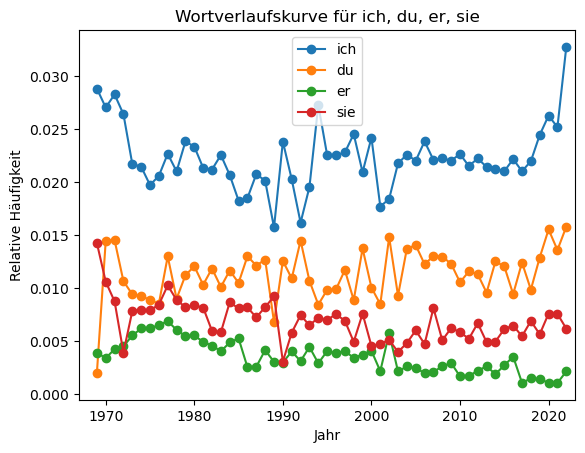

In [21]:
#Iterieren über die zu plottenden Wörter
for word in words:
    #Schaffen eines Sub-DataFrames über Filter
    word_df = songkorpus[songkorpus["Token"] == word]
    #Sortieren des Sub-DataFrames nach der Spalte "Jahr" und Zurücksetzen des Index
    word_df = word_df.sort_values(by="Jahr", ascending=True).reset_index()
    #Definieren von x und y, "Jahr" soll auf x-Achse geplotted werden, "Relative Häufigkeit" auf y-Achse
    x = word_df["Jahr"]
    y = word_df["Relative Häufigkeit"]
    #Eigentliches Plotten
    plt.plot(x, y, 'o-')

#Zusätzliches Verfeinern und Beschriften des Plots
plt.title(f"Wortverlaufskurve für {', '.join([word for word in words])}")
plt.xlabel("Jahr")
plt.ylabel("Relative Häufigkeit")
plt.xlim(1967, 2023)
plt.legend(words, loc="best")

***